# Plotting and Mapping Earthquakes(!) with Python
## Gina Schmalzle

In this workshop we are going to look at actual earthquake locations in the Pacific Northwest, along with their estimated depths (how deep they were) and magnitudes (how strong they shook).

A copy of this notebook and it's requirements are found in [this github repo](https://github.com/ginaschmalzle/girlswhocode_mapping_w_python).

# Background

The earth's crust is made up of tectonic plates that are slowly moving but get stuck at their edges due to friction. When the stress on the edge overcomes the friction, there is an earthquake that releases energy in waves that travel through the earth's crust and cause the shaking that we feel.  Everyday there are lots of little earthquakes that occur around the world.  Much less frequently are large earthquakes that we can feel and cause damage.

Here is a map of the earth's major tectonic plates: 

<img src=files/TectonicPlates.jpg  height="500" width="500" > 
**[Figure 1.](http://www.sanandreasfault.org/Tectonics.html) Major tectonic plate of the world.**

Sometimes these plates move apart, sometimes they slide past eachother, and sometimes one  slides under the other.  In the Pacific Northwest, we have the Juan de Fuca plate diving beneath the North America plate.  Below is a cartoon rendition that images how we think the Juan de Fuca plate is 'subducting' beneath the North America plate:

<img src=files/CascadiaSubduction.png  height="500" width="500" > 
**[Figure 2.](http://www.earthmagazine.org/article/unlocking-cascadia-subduction-zones-secrets-peering-recent-research-and-findings) The Cascadia Subduction Zone.**

### Where do you expect to see earthquakes?
### Have you been in an earthquake?


# Workshop Overview
In this workshop we will learn how to make:
1. Scatter Plots -- we will also learn how to change the attributes of the scatterplot.
2. Histograms -- we will play around with how these look too.
3. Maps!  We will also learn how to put data on maps too.

The Python modules we will use are:
1. pandas (dateframes)
2. matplotlib (static plotting)

# The Data 

We will be plotting earthquake locations, depths and magnitudes from 1906 to 2016 that occurred in the Pacific Northwest that have magnitudes greater than M2.5, retrieved from the USGS earthquake catalog (http://earthquake.usgs.gov/earthquakes/search/).


Below is an example of the first few lines of 'eqs.csv', a comma separated value (csv) file:

    time,latitude,longitude,depth,mag
    2016-02-08T16:50:07.960000,46.116833299999996,-122.16266670000002,7.08,2.85
    2016-02-08T02:12:35.220000,40.7853333,-123.49333329999999,21.27,2.99
    2016-02-06T06:49:55.070000,40.3301667,-124.6306667,22.97,2.71
    2016-02-05T22:13:02.370000,47.276166700000005,-122.2915,24.763,2.57
    2016-02-02T14:28:34.810000,40.7206667,-121.52383329999999,5.9,3.08
    2016-02-02T14:23:34.940000,40.719666700000005,-121.52266670000002,6.07,3.43
    2016-02-01T12:38:20.610000,40.4118333,-125.30033329999999,10.77,2.74
    2016-01-30T00:30:52.050000,41.005,-127.4447,10.0,4.9
    2016-01-30T00:28:41.490000,40.8966,-127.2722,10.0,5.0


# Retrieving the data 

First, let's Read the data. We will use the pandas module and import the data in as a dataframe.   

In [ ]:
# Import Pandas and pull csv data into dataframe
import pandas as pd
filename='eqs.csv'

# Need to read in times which require special formatting
dateparse = lambda x: pd.datetime.strptime(x[:-1], '%Y-%m-%dT%H:%M:%S.%f')

# Read in dataframe
eq_df = pd.read_csv(filename, parse_dates=['time'], date_parser=dateparse)

In [ ]:
eq_df

In [ ]:
eq_df['time']

# Plotting using Matplotlib

In [ ]:
%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np

## Setting figure parameters
You can set figure parameters using rcParams. A list of parameters you can change are shown using the .keys() method:

In [ ]:
mpl.rcParams.keys()

And you can see the value using the keys.  For example, if you want the resolution of your figure you would type:

In [ ]:
mpl.rcParams[u'figure.dpi']

So let's ensure that our plots have good resolution and are fairly sizeable:

In [ ]:
mpl.rcParams[u'figure.figsize'] = [12, 8]
mpl.rcParams[u'figure.dpi'] = 300

# Histograms!
Let's look a how many earthquakes are between Magnitude 2.5-3, 3-3.5, 3.5-4, etc.  You can look at this distribution by using a **histogram**.  A histogram will separate the magnitudes of our earthquake dataset into 'bins', and count how many earthquakes are in each bin.  The matplotlib pyplot method we will use is hist.

In [ ]:
plt.hist(eq_df['mag']) 
# Let's also include x and y labels and a title
plt.ylabel ('Counts')
plt.xlabel('Magnitude')
plt.title('Histogram of {0}'.format('Magnitude'))
# The plt.show() method will allow you to display the figure
plt.show()

Note that the number of really small earthquakes is really large, then there is a quick drop off the to number of earthquakes the larger in Magnitude they become (phew!).  In seismology, this phenomenon is known as the [Gutenberg-Richter Law](https://en.wikipedia.org/wiki/Gutenberg%E2%80%93Richter_law). 

Now let's jazz it up...

Let's increase the number of bins to 50. Let's also change the color of the bars and make them a little translucent.

In [ ]:
plt.hist(eq_df['mag'], bins = 50, color='green', alpha=0.2)
plt.ylabel ('Counts')
plt.xlabel('Magnitude')
plt.title('Histogram of {0}'.format('Magnitude'))
plt.show()

Pyplot histograms, like subplots, return objects that contain information about them.  Let's explore.  For this example, I am using only 10 bins.

In [ ]:
n, bins, patches = plt.hist(eq_df['mag'], bins = 10, color='green', alpha=0.2)

In [ ]:
# n are the number of counts
n

In [ ]:
# bins are the x-left-centered location of the bins
bins

In [ ]:
# And patches are a list of the matplotlib rectangle shapes that make 
# the bins.
patches

## Scatter Plots
The scatter method takes in x and y values in list or array format.  Maybe you want to see earthquake magnitude over time.  You will need to convert the date format we imported into the pandas dataframe into python's datetime.date() format.  

In [ ]:
plt.scatter([dt.date() for dt in eq_df['time']], eq_df['mag'])

*Interesting piece of history*: Prior to ~1970, the only earthquakes recorded were > M5.  Far less earthquakes were also recorded.  This is about the time seimic records were [recorded digitally](https://en.wikipedia.org/wiki/Seismometer#Recording), rather than being read by hand. This allowed for better and faster estimates of earthquakes around the world.

We are interested in plotting maps here, so let's just for fun, plot longitude and latitude on a scatter plot:

In [ ]:
plt.scatter(eq_df['longitude'], eq_df['latitude'])
plt.show()

You can change the [color and shape of markers in the plots](http://matplotlib.org/api/pyplot_api.html).  For example, we can change the round blue markers above to large green stars:

In [ ]:
plt.scatter(eq_df['longitude'], eq_df['latitude'], color = 'green', marker = '*', s=200)
# s is the size of the marker in points
plt.show()

Labels, labels, labels!  How is one to know what you just plotted?  Let's add the axes labels and the title

In [ ]:
plt.scatter(eq_df['longitude'], eq_df['latitude'], color = 'green', marker = '*', s=20)
plt.ylabel ('Latitude (deg N)')
plt.xlabel ('Longitude (deg W)')
plt.title ('Earthquakes 1906-Present')
plt.show()

# Coloring Points in a Scatter Plot
Let's try again, but this time, let's color the dots in the plot above by their depths.

In [ ]:
color_by = 'depth'
# Find the min and max 
max_color_by = max(eq_df[color_by])
min_color_by = min(eq_df[color_by])

fig, ax = plt.subplots()
#plt.subplots() method returns a tuple containing 
#figure and axes object(s). When using fig, ax = plt.subplots() 
#you unpack the tuple into the variables fig and ax. The fig object is 
#useful if you want to change figure-level attributes or save the 
#figure as an image file later (e.g. with fig.savefig('yourfilename.png').
#The axes objects contain the plotting methods that we will use to build 
#our plot.

s = ax.scatter(eq_df['longitude'], eq_df['latitude'],   
                c=eq_df[color_by],            # c defines the range of values being colored
                s=50,                         # s is the marker size
                marker='o',                   # Defines the markers as circles
                linewidths=0,                 # Remove marker outlines
                cmap = plt.cm.coolwarm,       # Coolwarm Color  palette (http://matplotlib.org/1.2.1/examples/pylab_examples/show_colormaps.html)
                vmin = min_color_by,          # Min value  
                vmax = max_color_by)          # Max value

# Now let's make a colorbar for reference
cbar = plt.colorbar(mappable = s)   # Mappable 'maps' the values of s to an array of RGB colors defined by a color palette
cbar.set_label(color_by)  # Set colorbar label
plt.xlabel('Longitude, Deg W')
plt.ylabel('Latitude, Deg N')
plt.title('Earthquakes colored by {0}'.format(color_by))
plt.show()

### Question 1:  How do you change the plot above to color by magnitude?
### Question 2:  How would you change the color palette? Try it!
### Question 3:  How would you make the circles slightly transparent?   Hint: an example of transparent circles are found here: http://matplotlib.org/examples/shapes_and_collections/scatter_demo.html  

# Geographic Mapping

Geographic maps of the earth (or any round object) provides a two-dimensional view of that object. Depending on the **projection** of the map, this could allow the observer to see the entire earth at once, rather than being confined to visualizing only one part of the globe at a time.  The trick is geometrically 'mapping' places on a round object to a flat surface.  

### Projections

Map projections are systematic mapping of a round surface to a flat surface.  There are many types of projections, a few we will see below.  For the round earth, each projection method needs to distort some part of it in order to make it flat.  We will see what this means in the next few exercises.

### Now, let's get mapping!
We will be using [Matplotlib's basemap](http://matplotlib.org/basemap/).  Basemap was imported in the second cell of this notebook.

#### Robinson Projection
The [Robinson projection](https://en.wikipedia.org/wiki/Robinson_projection) is commonly used to show all the landmasses of the earth at once.  The Robinson projection has pretty severe distortion at the poles, but quickly reduces to more moderate distortion as the map get closer to the equator.  

Using basemap, you will need to specify the longitude you want the projection to be centered at, and the resolution of your map.  A resolution of 'c' means use crude resolution coastlines. This next section was taken from the [basemap docs](http://matplotlib.org/basemap/users/robin.html).

In [ ]:
# Using basemap, define the projection, scale, the corners of the map, and the resolution and 
# assign the return object the variable name m.
m = Basemap(projection='robin',lon_0=0,resolution='c')
# Draw the coastlines
m.drawcoastlines()
# Color the continents
m.fillcontinents(color='coral',lake_color='aqua')
# draw parallels and meridians.
m.drawparallels(np.arange(-90.,91.,30.))
m.drawmeridians(np.arange(-180.,181.,60.))
# fill in the oceans 
m.drawmapboundary(fill_color='aqua')
plt.title("Robinson Projection")
plt.show()

### Question 4:   How do you rotate this map so that it is centered over the Pacific Northwest (longitude = -119 W?)

#### Mercator Projection
Let's make a simple [Mercator Projection Map](https://en.wikipedia.org/wiki/Mercator_projection).  [From Wiki](https://en.wikipedia.org/wiki/Mercator_projection) -- *The Mercator projection distorts the size of objects as the latitude increases from the Equator to the poles, where the scale becomes infinite. So, for example, landmasses such as Greenland and Antarctica appear much larger than they actually are relative to land masses near the equator, such as Central Africa.*  The code in the next cell is straight from the [Basemap example section](http://matplotlib.org/basemap/users/merc.html).

**llcrnrlat, llcrnrlon, urcrnrlat and urcrnrlon** are the lat/lon values of the lower left (ll) and upper right (ur) corners of the map.  

In [ ]:
# Using basemap, define the projection, scale, the corners of the map, and the resolution and 
# assign the return object the variable name m.
m = Basemap(projection='merc',llcrnrlat=-80,urcrnrlat=80,\
            llcrnrlon=-180,urcrnrlon=180,resolution='c')
# Draw the coastlines
m.drawcoastlines()
# Color the continents
m.fillcontinents(color='coral',lake_color='aqua')
# draw parallels and meridians.
m.drawparallels(np.arange(-90.,91.,30.))
m.drawmeridians(np.arange(-180.,181.,60.))
# fill in the oceans 
m.drawmapboundary(fill_color='aqua')
plt.title("Mercator Projection")
plt.show()

### Question 5:  What are some key differences between the Robinson and Mercator projections?  

### Question 6:  Follow the directions below:

The cell below contains the same code as the previous cell.  Please:

1. Change the area to map only map the Pacific Northwest (Latitudes = 38-52 deg North; Longitudes = -135 to -118 deg West)
2. Increase the resolution to intermediate ('i')
3. Change the ocean and lake colors to white and land color to grey
4. Redraw parallels and meridians to every 5 degrees

In [ ]:
# Using basemap, define the projection, scale, the corners of the map, and the resolution and 
# assign the return object the variable name m.
m = Basemap(projection='merc',llcrnrlat=-80,urcrnrlat=80,\
            llcrnrlon=-180,urcrnrlon=180,resolution='c')
# Draw the coastlines
m.drawcoastlines()
# Color the continents
m.fillcontinents(color='coral',lake_color='aqua')
# draw parallels and meridians.
m.drawparallels(np.arange(-90.,91.,30.))
m.drawmeridians(np.arange(-180.,181.,60.))
# fill in the oceans 
m.drawmapboundary(fill_color='aqua')
plt.title("Mercator Projection")
plt.show()

Now let's bring in the earthquake data!

In [ ]:
# Using basemap, define the projection, scale, the corners of the map, and the resolution and 
# assign the return object the variable name m.
m = Basemap(projection='merc',llcrnrlat=38,urcrnrlat=52,\
            llcrnrlon=-135,urcrnrlon=-118,resolution='i')
# Draw the coastlines
m.drawcoastlines()
# Color the continents
# Bug in drawcoastlines does not allow points mapped above land. We use drawlsmask instead.
m.drawlsmask(land_color='0.8', ocean_color='w')   
# draw parallels and meridians.
m.drawparallels(np.arange(-90.,91.,5.))
m.drawmeridians(np.arange(-180.,181.,5.))
plt.title("Earthquakes")
# Transform long and lat to the map projection
# Each lat and long value in the maps above are 'mapped' to specific pixels that make up the image
# The mapping, defined by the projection used, needs to also be done on the data set.
x,y = m(eq_df['longitude'].values, eq_df['latitude'].values)  
# Now you can use the plt.scatter method to plot your data!
plt.scatter(x,y)
plt.show()

Now let's color the earthquakes by depth.  Modifying the code above:

In [ ]:
# Using basemap, define the projection, scale, the corners of the map, and the resolution and 
# assign the return object the variable name m.
m = Basemap(projection='merc',llcrnrlat=38,urcrnrlat=52,\
            llcrnrlon=-135,urcrnrlon=-118,resolution='i')
# Draw the coastlines
m.drawcoastlines()
# Color the continents
# Bug in drawcoastlines does not allow points mapped above land. We use drawlsmask instead.
m.drawlsmask(land_color='0.8', ocean_color='w')   
# draw parallels and meridians.
m.drawparallels(np.arange(-90.,91.,5.))
m.drawmeridians(np.arange(-180.,181.,5.))
plt.title("Earthquakes")
# Transform long and lat to the map projection
x,y = m(eq_df['longitude'].values, eq_df['latitude'].values)  

# Define your colormap
coolwarm = plt.cm.get_cmap('coolwarm')
# The scatter plot method allows you to define the min and max value of your color set (vmin and vmax),
# as well as the colormap you defined in the line above.  We will give the plt.scatter object a variable
# name that we will use later to add the color bar to it.
colorby = 'depth'
sc = plt.scatter(x,y, c=eq_df[colorby].values, vmin=eq_df[colorby].min(), vmax =eq_df[colorby].max(), cmap=coolwarm, s=20, edgecolors='none')
cbar = plt.colorbar(sc, shrink = .5)
cbar.set_label(colorby)
plt.show()

Now instead of drawing coastlines, let's try using topography imagery from [etopo](http://www.earthmodels.org/data-and-tools/topography/etopo), built into the basemap package.  For now we will omit the earthquake data:

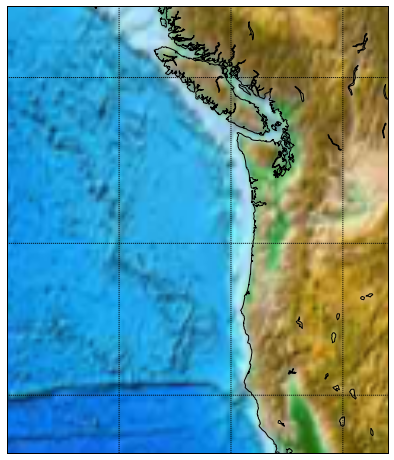

In [39]:
# Using basemap, define the projection, scale, the corners of the map, and the resolution and 
# assign the return object the variable name m.
m = Basemap(projection='merc',llcrnrlat=38,urcrnrlat=52,\
            llcrnrlon=-135,urcrnrlon=-118,lat_ts=20,resolution='i')
# Map topography
m.etopo(alpha=1, scale = 0.5)
m.drawcoastlines()
m.drawparallels(np.arange(-90.,91.,5.))
m.drawmeridians(np.arange(-180.,181.,5.))
plt.show()

Now let's plot our earthquakes!  Let's also increase the transparency of our etopo data.

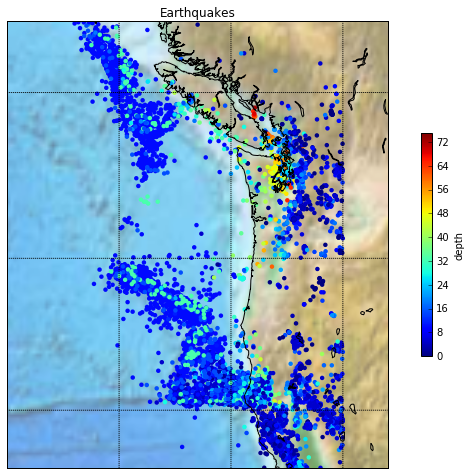

In [40]:
# Using basemap, define the projection, scale, the corners of the map, and the resolution and 
# assign the return object the variable name m.
m = Basemap(projection='merc',llcrnrlat=38,urcrnrlat=52,\
            llcrnrlon=-135,urcrnrlon=-118,lat_ts=20,resolution='i')
# Map topography
m.etopo(alpha=.6, scale = 0.5)
m.drawcoastlines()
# m.etopo()  # Resolution can change with 'scale' 
m.drawparallels(np.arange(-90.,91.,5.))
m.drawmeridians(np.arange(-180.,181.,5.))
plt.title("Earthquakes")
#Transform long and lat to the map projection
x,y = m(eq_df['longitude'].values, eq_df['latitude'].values)  
# Note I'm using a different color palette!  
# http://matplotlib.org/examples/color/colormaps_reference.html
jet = plt.cm.get_cmap('jet')
sc = plt.scatter(x,y, c=eq_df['depth'].values, vmin=0, vmax =75, cmap=jet, s=20, edgecolors='none')
cbar = plt.colorbar(sc, shrink = .5)
cbar.set_label('depth')
plt.show()

### Question 7:  Some of the deepest earthquakes on this map are show under where we live!  Why do you think that is?